In [ ]:
library(tidyverse)
library(boot)
library(ggplot2)
library(gridExtra) # multi plot
library(ipred) # CV k fold
library(car) # for VIF

data = read.csv("synthetic_health_data.csv")
data <- data |> janitor::clean_names()
glimpse(data)

Rows: 1,000
Columns: 8
$ age                 <dbl> 45.96057, 38.34083, 47.77226, 58.27636, 37.19016, ~
$ bmi                 <dbl> 31.99678, 29.62317, 25.29815, 21.76532, 28.49112, ~
$ exercise_frequency  <int> 5, 6, 5, 2, 2, 2, 5, 3, 4, 4, 1, 4, 4, 2, 2, 5, 1,~
$ diet_quality        <dbl> 55.40327, 41.83836, 76.90495, 49.75677, 44.21874, ~
$ sleep_hours         <dbl> 7.300359, 7.012419, 6.028641, 5.802714, 7.912548, ~
$ smoking_status      <int> 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,~
$ alcohol_consumption <dbl> 2.8347071, 7.1995168, 4.0979438, 3.6493772, 2.8397~
$ health_score        <dbl> 70.54212, 57.24464, 96.33372, 61.32178, 67.17589, ~


In [92]:
data <- data |> drop_na(health_score)
glimpse(data)

Rows: 1,000
Columns: 8
$ age                 <dbl> 45.96057, 38.34083, 47.77226, 58.27636, 37.19016, ~
$ bmi                 <dbl> 31.99678, 29.62317, 25.29815, 21.76532, 28.49112, ~
$ exercise_frequency  <int> 5, 6, 5, 2, 2, 2, 5, 3, 4, 4, 1, 4, 4, 2, 2, 5, 1,~
$ diet_quality        <dbl> 55.40327, 41.83836, 76.90495, 49.75677, 44.21874, ~
$ sleep_hours         <dbl> 7.300359, 7.012419, 6.028641, 5.802714, 7.912548, ~
$ smoking_status      <int> 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,~
$ alcohol_consumption <dbl> 2.8347071, 7.1995168, 4.0979438, 3.6493772, 2.8397~
$ health_score        <dbl> 70.54212, 57.24464, 96.33372, 61.32178, 67.17589, ~


## Ước lượng mô hình

In [93]:
linear_model <- lm(formula=health_score ~ ., data=data)
print(summary(linear_model))


Call:
lm(formula = health_score ~ ., data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-25.3986  -3.4191   0.5399   3.9884  14.8667 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         64.00511    1.66617   38.41   <2e-16 ***
age                 -0.23801    0.01504  -15.82   <2e-16 ***
bmi                 -1.13206    0.03548  -31.91   <2e-16 ***
exercise_frequency   1.78088    0.08851   20.12   <2e-16 ***
diet_quality         0.60577    0.01180   51.34   <2e-16 ***
sleep_hours          2.42658    0.11648   20.83   <2e-16 ***
smoking_status      -3.64026    0.35323  -10.31   <2e-16 ***
alcohol_consumption -0.93193    0.08472  -11.00   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.577 on 992 degrees of freedom
Multiple R-squared:  0.8339,	Adjusted R-squared:  0.8327 
F-statistic: 711.3 on 7 and 992 DF,  p-value: < 2.2e-16



Nhận xét nhanh:
- Cứ tăng `age` lên 10 đơn vị thì là `heath_score` giảm khoảng 2.3 
- Cứ tăng `bmi` lên 10 đơn vị thì `heath_score` giảm khoảng 11.3
- Cứ tăng `diet_quality` lên 10 đơn vị thì `heath_score` tăng khoảng 6.1
- Cứ tăng `sleep_hours` lên 10 đơn vị thì `heath_score` tăng khoảng 24.2
- Cứ tăng `alcohol_consumption` lên 10 đơn vị thì `heath_score` giảm khoảng 9.3

## Áp dụng bootstrap 

Để ước lượng khoảng tin cậy và kiểm định giả thuyết $\beta_j=0$, đầu tiên là hàm `fun_boot_md()` để thực hiện ước tính mỗi lần lặp lấy mẫu 

In [94]:
fun_boot_md <- function(data, ind, formula) {
    data_new <- data[ind,]
    out_md <- lm(formula = formula, data = data_new)
    return(out_md$coefficients)
}

In [95]:
set.seed(42)
out_boot <- boot(data = data, statistic = fun_boot_md, R = 1000, formula = health_score ~ .)
out_boot


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = data, statistic = fun_boot_md, R = 1000, formula = health_score ~ 
    .)


Bootstrap Statistics :
      original        bias    std. error
t1* 64.0051089 -9.997210e-03  1.70041393
t2* -0.2380125  4.455286e-04  0.01565772
t3* -1.1320586 -1.805552e-04  0.04031471
t4*  1.7808754 -1.683417e-03  0.09030991
t5*  0.6057666 -6.657601e-05  0.01425079
t6*  2.4265795  9.840331e-04  0.12423422
t7* -3.6402567  9.814870e-03  0.35128982
t8* -0.9319251  2.792256e-04  0.08512602

Ước lượng khoảng tin cậy bootstrap và vẽ histogram để xem kết quả

In [96]:
ci_histogram_plot <- function(out_boot, index, conf) {
    ci <- boot.ci(out_boot, index=index, type="perc", conf=conf)
    plot <- ggplot(data=data.frame(t=out_boot$t[, index]), mapping=aes(x=t)) + 
    geom_histogram(fill = "gray80", color="black", bins=20) +
    geom_vline(xintercept = out_boot$t0[index], color = "blue", linetype="dashed") +
    xlab("Bootstrap Estimates of Coefficients") + ylab("Frequency") + theme_bw()
    print(ci)
    return(plot)
}

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = out_boot, conf = conf, type = "perc", index = index)

Intervals : 
Level     Percentile     
5%   (63.89, 64.09 )  
Calculations and Intervals on Original Scale


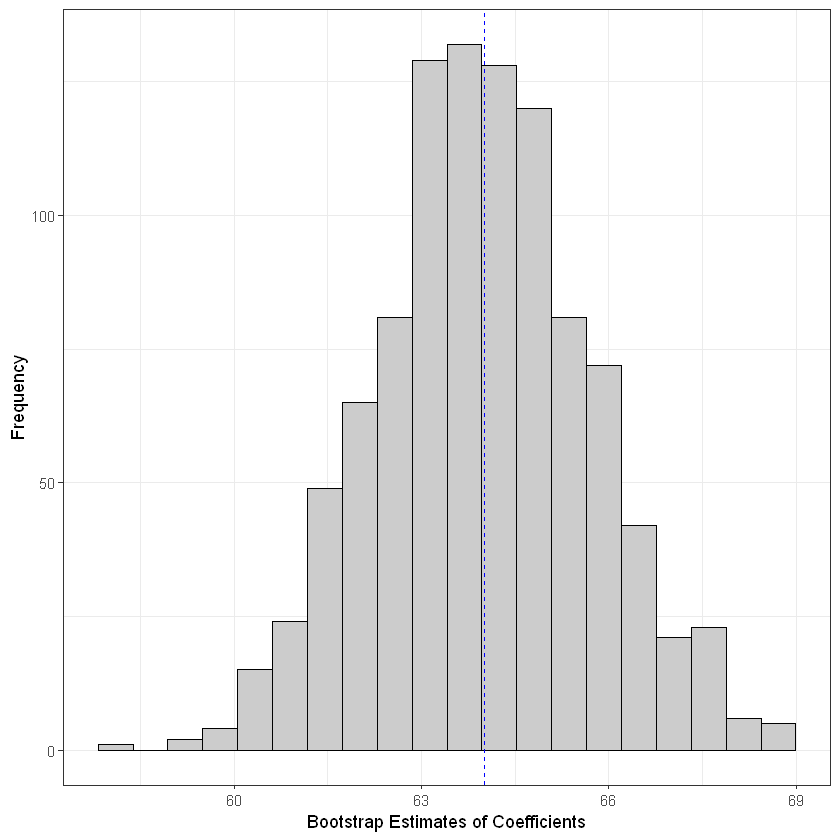

In [97]:
ci_histogram_plot(out_boot = out_boot, index=1, conf = 0.05)

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = out_boot, conf = conf, type = "perc", index = index)

Intervals : 
Level     Percentile     
5%   (-0.2387, -0.2370 )  
Calculations and Intervals on Original Scale


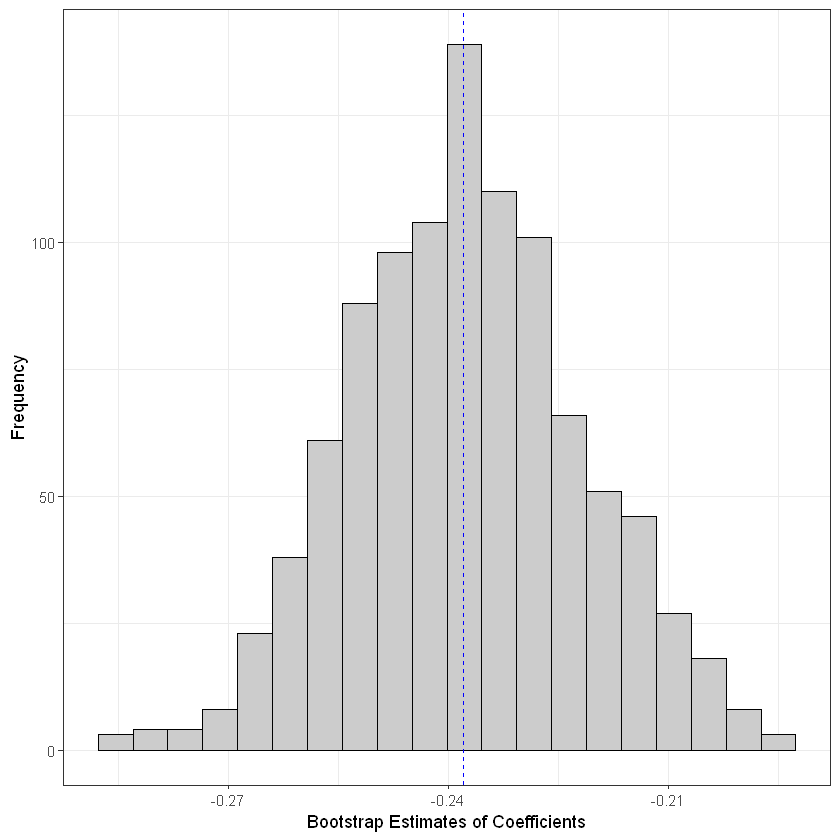

In [98]:
ci_histogram_plot(out_boot = out_boot, index=2, conf = 0.05)

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = out_boot, conf = conf, type = "perc", index = index)

Intervals : 
Level     Percentile     
5%   (-1.137, -1.131 )  
Calculations and Intervals on Original Scale


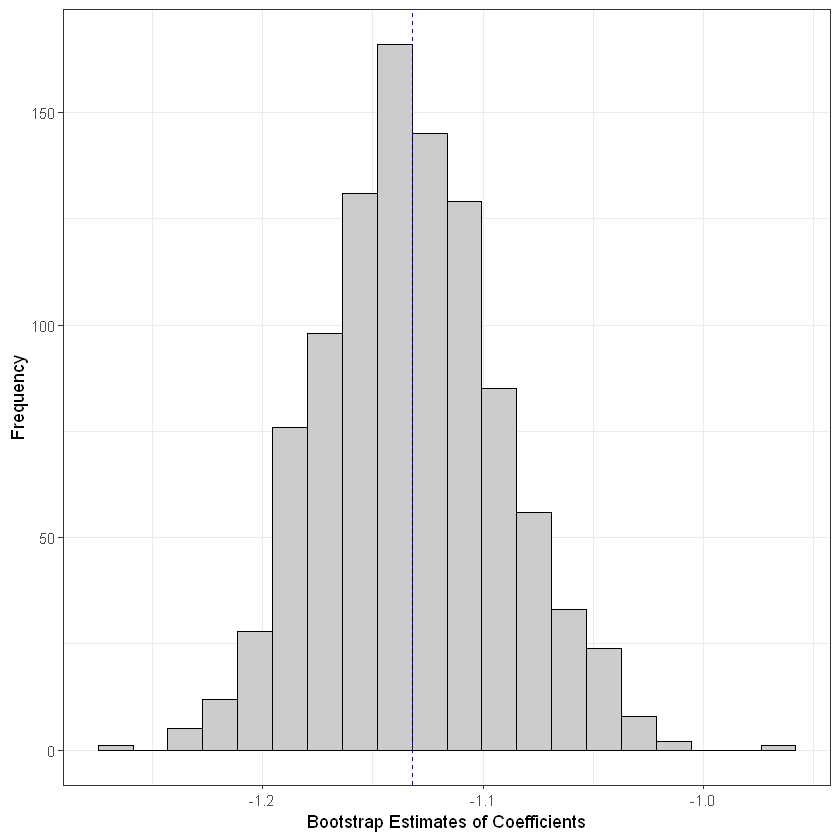

In [99]:
ci_histogram_plot(out_boot = out_boot, index=3, conf = 0.05)

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = out_boot, conf = conf, type = "perc", index = index)

Intervals : 
Level     Percentile     
5%   (1.772, 1.785 )  
Calculations and Intervals on Original Scale


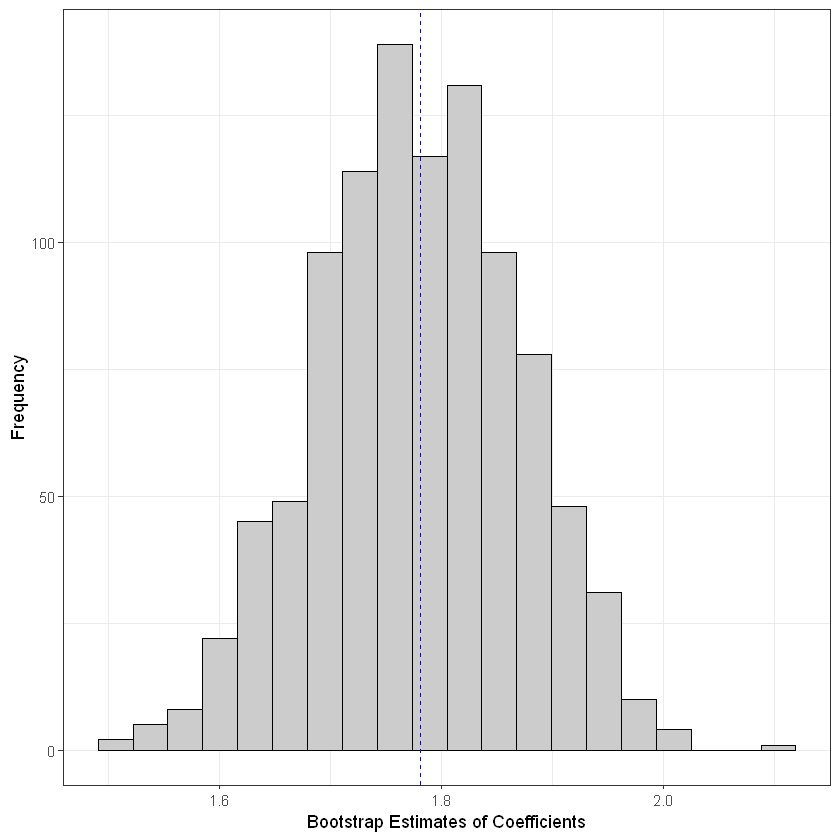

In [100]:
ci_histogram_plot(out_boot = out_boot, index=4, conf = 0.05)

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = out_boot, conf = conf, type = "perc", index = index)

Intervals : 
Level     Percentile     
5%   (0.6050, 0.6065 )  
Calculations and Intervals on Original Scale


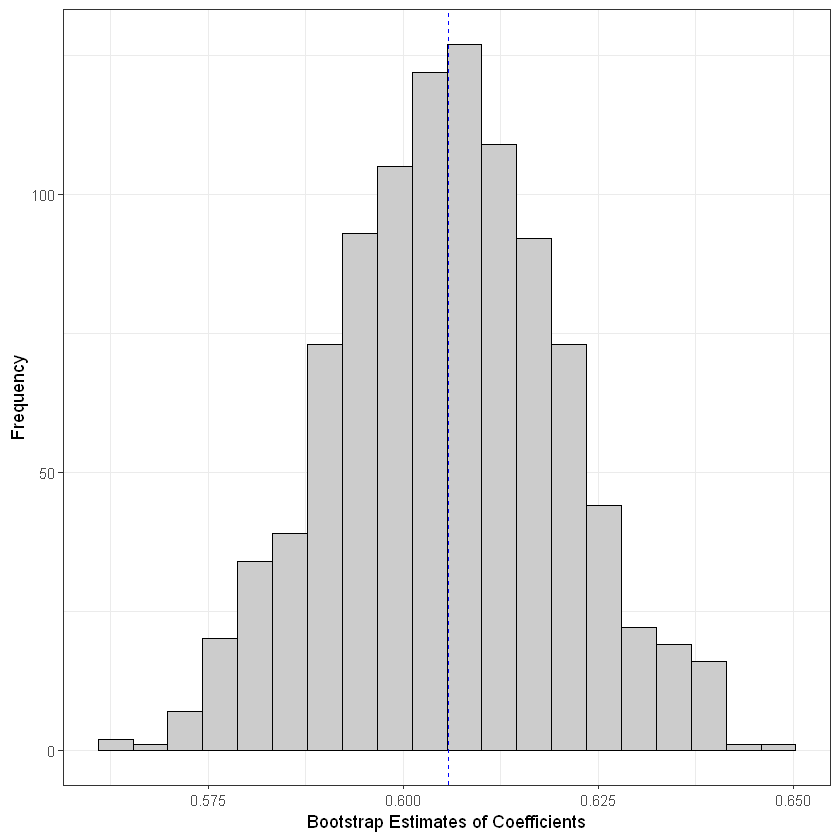

In [101]:
ci_histogram_plot(out_boot = out_boot, index=5, conf = 0.05)

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = out_boot, conf = conf, type = "perc", index = index)

Intervals : 
Level     Percentile     
5%   (2.417, 2.432 )  
Calculations and Intervals on Original Scale


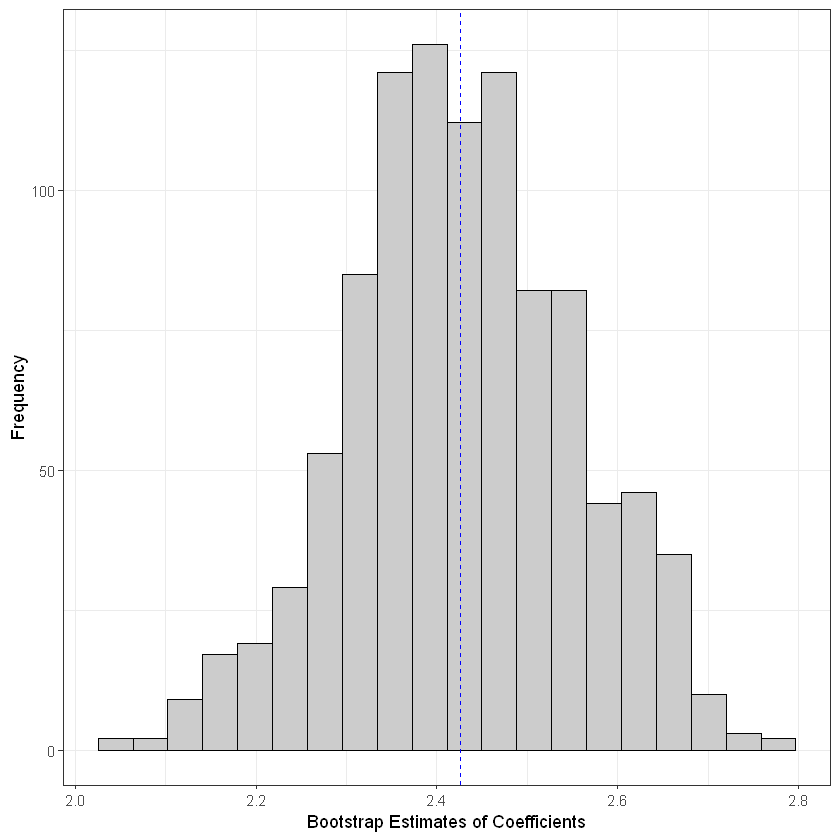

In [102]:
ci_histogram_plot(out_boot = out_boot, index=6, conf = 0.05)

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = out_boot, conf = conf, type = "perc", index = index)

Intervals : 
Level     Percentile     
5%   (-3.668, -3.631 )  
Calculations and Intervals on Original Scale


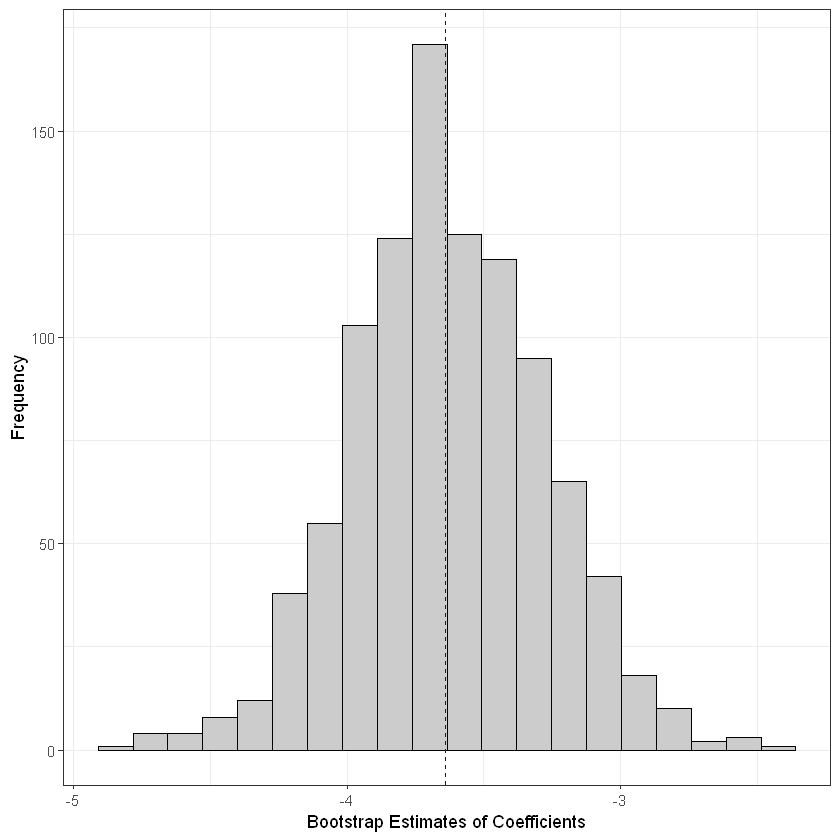

In [103]:
ci_histogram_plot(out_boot = out_boot, index=7, conf = 0.05)

Tính p-value cho kiểm định giả thuyết $\beta_j = 0$

In [104]:
pvals_data <- sapply(1:ncol(out_boot$t), function(x) {
    qt0 <- mean(out_boot$t[, x] <= 0)
    if (qt0 < 0.5) {
        return(2 * qt0)
    } else {
        return(2 * (1 - qt0))
    }
})
pvals_data_value <- data.frame(P_Value=pvals_data)
print(pvals_data_value)

  P_Value
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0


Ta thấy được tất cả p-value của các biến trong mô hình đều bằng 0, với mức ý nghĩa 5% vậy ta có thể bác bỏ được giả thuyết các $\beta_j=0$ vậy nghĩa là tất cả các biến đều có mối quan hệ có ý nghĩa thống kê với biến phụ thuộc `heath_score` 

Thử predict giá trị cho đầu ra

In [105]:
print(predict(linear_model, newdata= data.frame(age=40, bmi=29, exercise_frequency=3, diet_quality=41, sleep_hours=7, smoking_status=0, alcohol_consumption=3)))

       1 
66.02425 


In [106]:
# Predict the health_score for the given new data
predicted_value <- predict(linear_model, newdata= data.frame(age=40, bmi=29, exercise_frequency=3, diet_quality=41, sleep_hours=7, smoking_status=0, alcohol_consumption=3))
print(predicted_value)
# Function to predict health_score for new data using bootstrap samples
predict_bootstrap <- function(linear_model, newdata, R = 1000) {
    bootstrap_preds <- numeric(R)
    for (i in 1:R) {
        sample_indices <- sample(1:nrow(data), replace = TRUE)
        bootstrap_sample <- data[sample_indices, ]
        bootstrap_model <- lm(formula = health_score ~ ., data = bootstrap_sample)
        bootstrap_preds[i] <- predict(bootstrap_model, newdata = newdata)
    }
    return(bootstrap_preds)
}

# Predict health_score for new data using bootstrap
set.seed(42)
bootstrap_predictions <- predict_bootstrap(linear_model, newdata = data.frame(age=40, bmi=29, exercise_frequency=3, diet_quality=41, sleep_hours=7, smoking_status=0, alcohol_consumption=3))

# Calculate confidence interval
ci <- quantile(bootstrap_predictions, probs = c(0.025, 0.975))
print(ci)

       1 
66.02425 


    2.5%    97.5% 
65.07308 66.95966 


In [107]:
resid <- residuals(linear_model)
y_data_pd_pci <- bootstrap_predictions + sample(resid, size = 1000, replace = TRUE)
print(quantile(y_data_pd_pci, probs = c(0.025, 0.975)))

    2.5%    97.5% 
51.41411 75.61745 


## Đánh giá mô hình

- Sử dụng công thức $\displaystyle\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i-\hat{y}_i)^2}$ 
- Sử dụng các phương pháp cross-validation

In [108]:
RMSE <- function(y_real, y_pred) {
  if (length(y_real) != length(y_pred)) {
    stop("Invalid Input: Length of y_real and y_pred must be equal.")
  }
  sqrt(mean((y_real - y_pred)^2))
}

Đầu tiên là phương pháp train test split (theo tỷ lệ `5-5`, `6-4`, `7-3`)

In [109]:
train_test_split <- function(data, train_ratio = 0.7) {
  train_indices <- sample(seq_len(nrow(data)), size = floor(train_ratio * nrow(data)), replace = FALSE)
  train_data <- data[train_indices, ]
  test_data <- data[-train_indices, ]
  res <- list(
    train_data = train_data,
    test_data = test_data
  )
  return(res)
}

RMSE_train_ratio <- function(data, formula, train_ratio = 0.8) {
  splited_data <- train_test_split(data, train_ratio = train_ratio)
  train_data <- splited_data$train_data
  test_data <- splited_data$test_data
  new_lr <- lm(data = train_data, formula = formula)
  
  # predict
  set.seed(42)
  y_pred <- predict(new_lr, newdata = test_data)
  
  # calculate residuals
  residuals_new_lr <- residuals(new_lr)
  
  # Add residuals to predict
  y_pred_with_residuals <- y_pred + sample(residuals_new_lr, size = length(y_pred), replace = TRUE)
  
  # Calculate RMSE
  rmse_value <- RMSE(test_data$health_score, y_pred_with_residuals) # chỉnh biến mục tiêu ở đây
  return(rmse_value)
}

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

In [110]:
traintest = train_test_split(data, train_ratio = 0.5)
train = traintest$train
test = traintest$test

In [111]:
# 5-5 train test split
RMSE_train_ratio(data, formula=health_score ~ ., train_ratio = 0.5)

[1] 8.082964

In [112]:
# 6-4 train test split
RMSE_train_ratio(data, formula=health_score ~ ., train_ratio = 0.6)

[1] 7.026796

In [113]:
# 7-3 train test split
RMSE_train_ratio(data, formula=health_score ~ ., train_ratio = 0.7)

[1] 8.116805

Cross Leave One Out

In [114]:
loocv <- function(data, formula) {
    n <- nrow(data)
    y_real <- numeric(n)
    y_pred <- numeric(n)
    
    for (i in 1:n) {
        train_data <- data[-i, ]
        test_data <- data[i, , drop = FALSE]
        
        model <- lm(formula, data = train_data)
        
        prediction <- predict(model, newdata = test_data)
        
        y_real[i] <- test_data$health_score # chỉnh biến mục tiêu ở đây
        y_pred[i] <- prediction
    }
    
    rmse <- RMSE(y_real, y_pred)
    return(rmse)
}

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

In [115]:
loocv(data=data, formula = health_score ~ .)

[1] 5.604882

Cross-validation (k-Fold), ta Cross với $k=10$

In [116]:
# Apply errorest function for 10-fold cross-validation
cv_error <- errorest(formula = health_score ~ ., data = data, model = lm, est.para = control.errorest(k = 10))
print(cv_error)


Call:
errorest.data.frame(formula = health_score ~ ., data = data, 
    model = lm, est.para = control.errorest(k = 10))

	 10-fold cross-validation estimator of root mean squared error

Root mean squared error:  5.6118 



## Chuẩn đoán mô hình

Ta plot lên biểu đồ Residual và Fitted

`geom_smooth()` using formula = 'y ~ x'


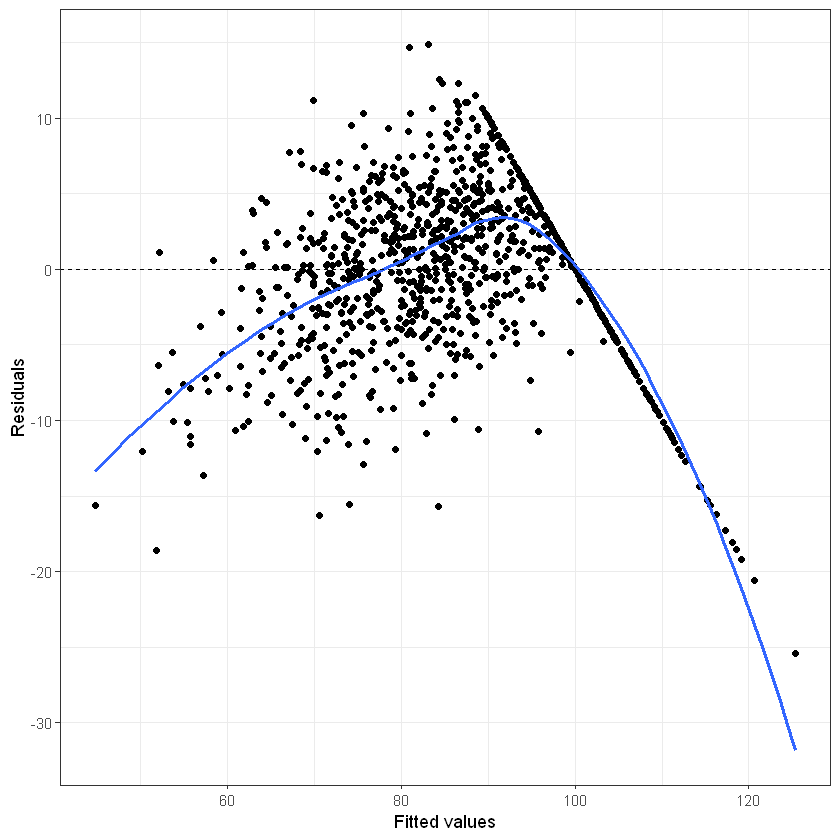

In [117]:
ggplot(data = linear_model, mapping = aes(x = .fitted, y = .resid)) +
    geom_point() +
    geom_smooth(method = "loess", se = FALSE) +
    geom_hline(yintercept = 0, linetype = "dashed") +
    labs(x = "Fitted values", y = "Residuals") +
    theme_bw()

Hình vẽ cho thấy một xu hướng đường cong rõ ràng, giả định về tính tuyến tính của mô hình là không phù hợp

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows`geom_smooth()` using formula = 'y ~ x'


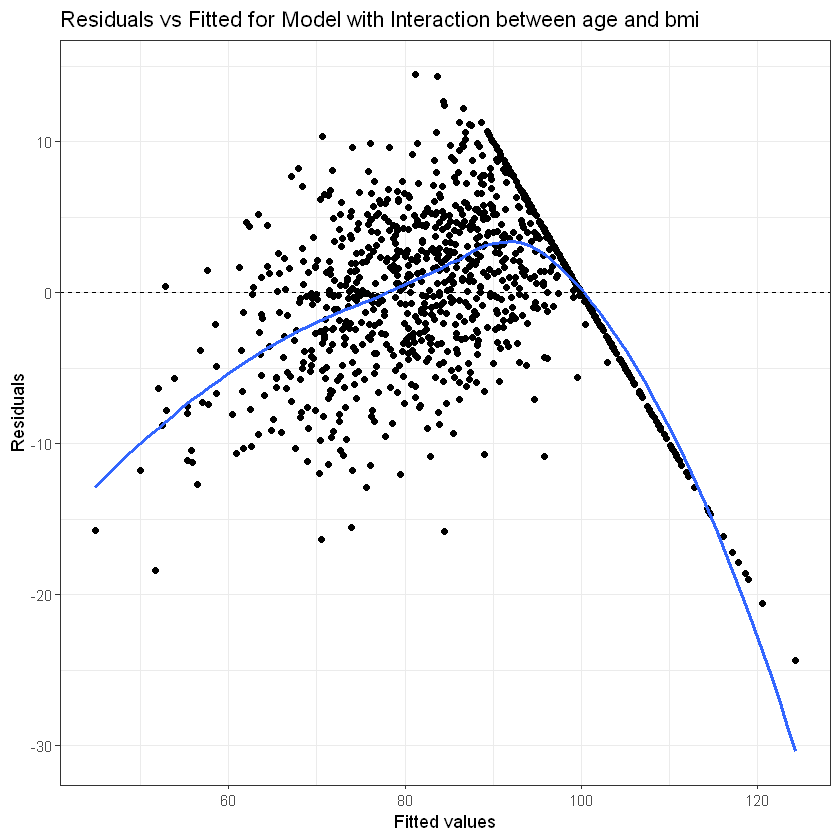

In [118]:
# Fit the model with interaction between tv and radio
model_interaction <- lm(health_score ~ age*bmi + exercise_frequency + diet_quality + sleep_hours + smoking_status + alcohol_consumption, 
        data = data) # chỉnh công thức

# Plot Residuals vs Fitted values
ggplot(data = model_interaction, mapping = aes(x = .fitted, y = .resid)) +
    geom_point() +
    geom_smooth(method = "loess", se = FALSE) +
    geom_hline(yintercept = 0, linetype = "dashed") +
    labs(x = "Fitted values", y = "Residuals", title = "Residuals vs Fitted for Model with Interaction between age and bmi") +
    theme_bw()

Kiểm tra tính tuyến tính từng phần, ta sử dụng biểu đồ thặng dư từng phần (partial residual plots)

In [119]:
terms_md <- predict(linear_model, type='term')

In [120]:
head(terms_md)

,age,bmi,exercise_frequency,diet_quality,sleep_hours,smoking_status,alcohol_consumption
1,-1.3634747,-7.51980791,3.761209,-8.813726,0.79403602,1.816488,0.2280137
2,0.4501188,-4.83274369,5.542084,-17.030896,0.09532563,-1.823769,-3.8396622
3,-1.7946801,0.06342849,3.761209,4.211272,-2.29189087,-1.823769,-0.9492284
4,-4.2947859,4.06280556,-1.581417,-12.234188,-2.84011934,-1.823769,-0.5311978
5,0.7239923,-3.55119467,-1.581417,-15.588942,2.27956118,1.816488,0.2232720
6,0.7239454,-1.82628871,-1.581417,11.613672,1.97366836,-1.823769,1.3844854


In [121]:
# xác định thặng dư từng phần
partial_residual_md <- residuals(linear_model, type='partial')
head(partial_residual_md)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

,age,bmi,exercise_frequency,diet_quality,sleep_hours,smoking_status,alcohol_consumption
1,-5.204039,-11.3603718,-0.07935499,-12.65429,-3.0465278,-2.0240758,-3.612550
2,-6.345650,-11.6285120,-1.25368405,-23.82666,-6.7004427,-8.6195369,-10.635431
3,7.882753,9.7408620,13.43864236,13.88871,7.3855426,7.8536649,8.728205
4,-9.210279,-0.8526875,-6.49691047,-17.14968,-7.7556124,-6.7392617,-5.446691
5,-1.901821,-6.1770076,-4.20723029,-18.21475,-0.3462517,-0.8093248,-2.402541
6,4.779702,2.2294677,2.47433900,15.66943,6.0294247,2.2319878,5.440242


In [122]:
# hàm vẽ biểu đồ thặng dư cho từng biến
plot_partial_residual <- function(data, terms, partial_resid, variable) {
    data_part_resid <- tibble(
        x = data[[variable]],
        terms_x = terms[, variable],
        partial_resid_x = partial_resid[, variable]
    )
    plot <- ggplot(data_part_resid, mapping = aes(x, partial_resid_x)) +
        geom_point() +
        geom_smooth(method = "loess", se = FALSE, linetype = "dashed", color = "forestgreen") +
        geom_line(aes(x = x, y = terms_x), color = "blue") +
        labs(x = variable, y = "Partial Residuals") +
        theme_bw()
    return(plot)
}

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

`geom_smooth()` using formula = 'y ~ x'


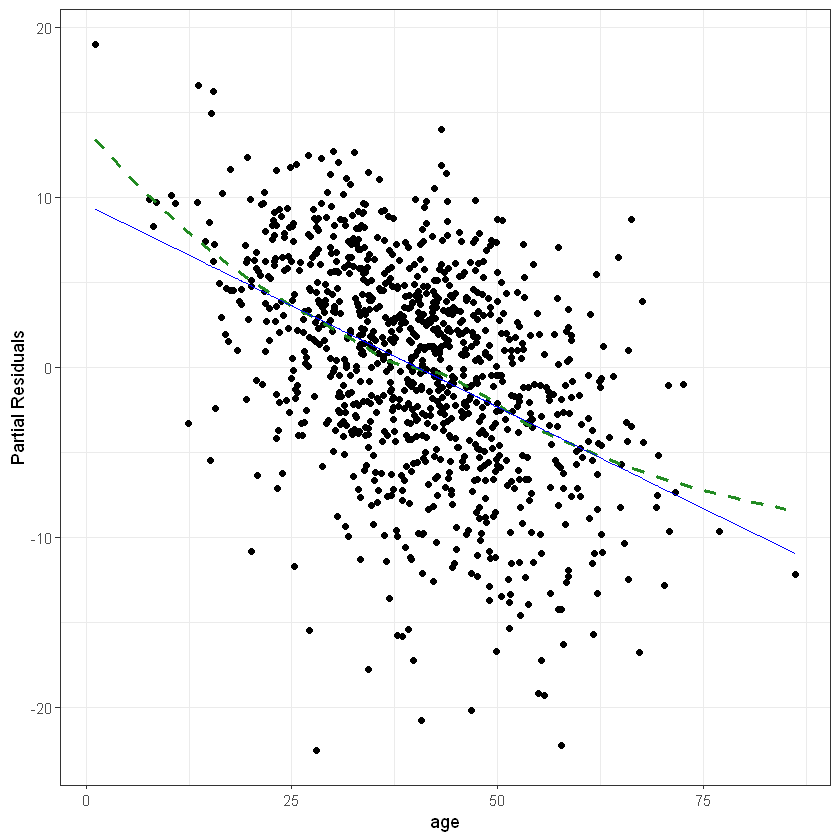

In [123]:
plot_partial_residual(data, terms_md, partial_residual_md, variable = "age")

Đường thẳng tuyến tính (màu xanh dương) ước lượng không khớp với dữ liệu. Underestimate trong khoảng từ bé hơn 23 và lớn hơn 68

Đường cong nét đứt (màu xanh lá) cho thấy xu hướng mối quan hệ phi tuyến tính của biến `age` và `health_score`

`geom_smooth()` using formula = 'y ~ x'


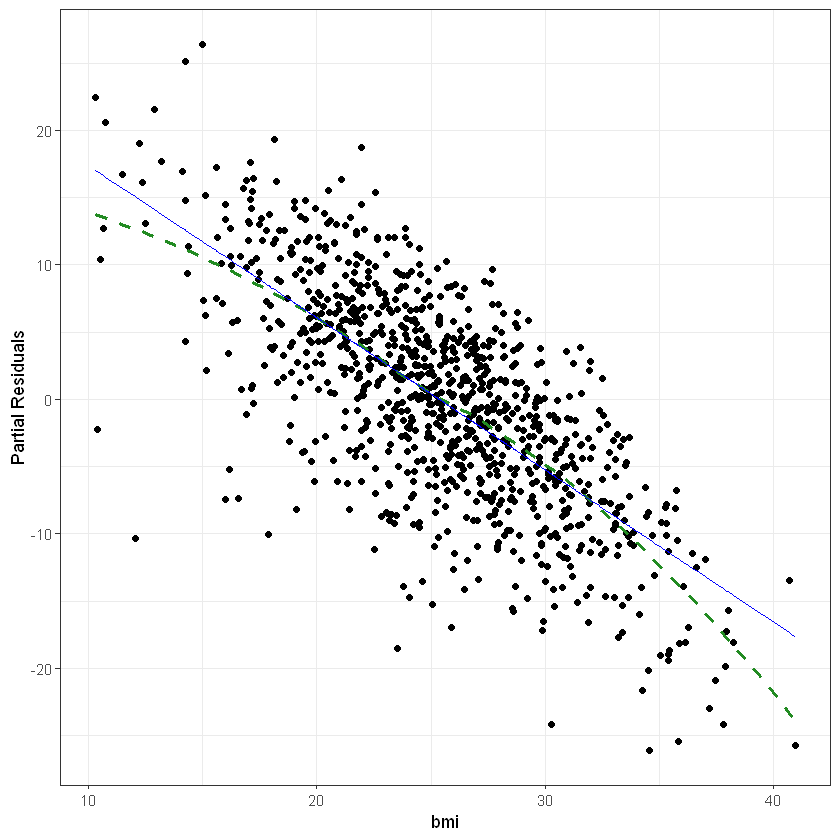

In [124]:
plot_partial_residual(data, terms_md, partial_residual_md, variable = "bmi")

Đường thẳng tuyến tính (màu xanh dương) ước lượng không khớp với dữ liệu. Underestimate trong khoảng từ bé hơn 17 và lớn hơn 34

Đường cong nét đứt (màu xanh lá) cho thấy xu hướng mối quan hệ phi tuyến tính của biến `bmi` và `health_score`

`geom_smooth()` using formula = 'y ~ x'


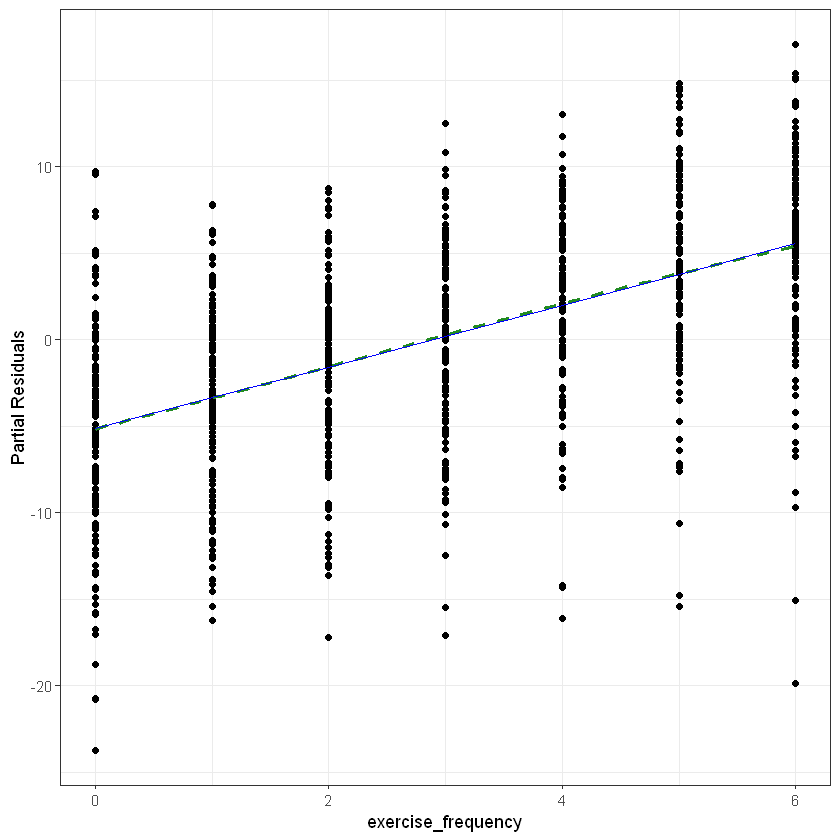

In [125]:
plot_partial_residual(data, terms_md, partial_residual_md, variable = "exercise_frequency")

Kết quả cho thấy đường thẳng tuyến tính (màu xanh dương) ước lượng tương đối khớp với dữ liệu

`geom_smooth()` using formula = 'y ~ x'


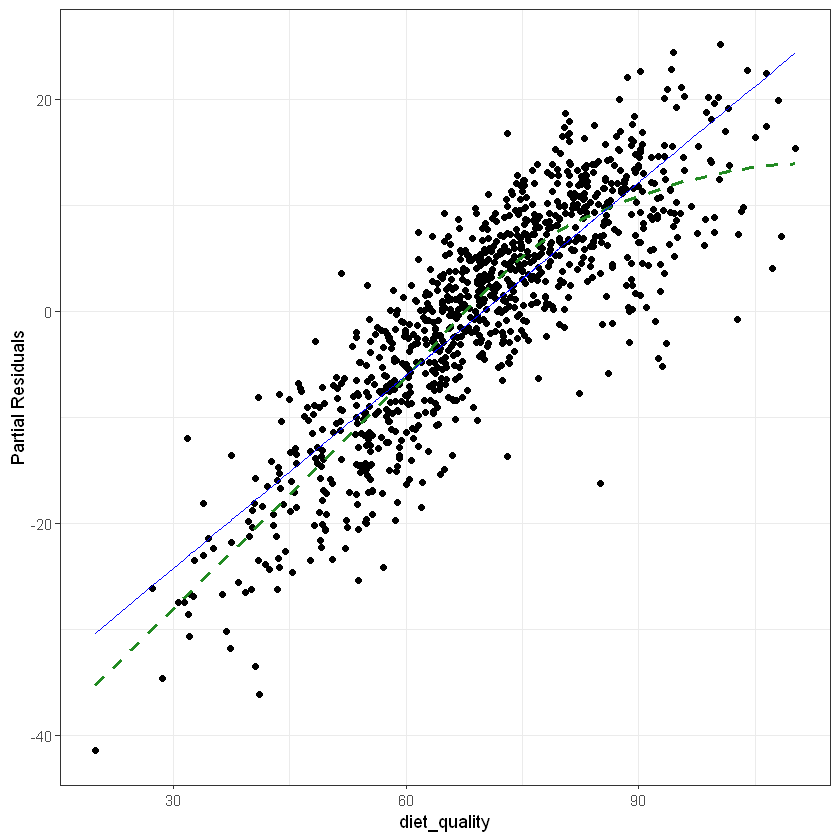

In [126]:
plot_partial_residual(data, terms_md, partial_residual_md, variable = "diet_quality")

Đường thẳng tuyến tính (màu xanh dương) ước lượng không khớp với dữ liệu. Underestimate trong khoảng từ bé hơn 60 và lớn hơn 90

Đường cong nét đứt (màu xanh lá) cho thấy xu hướng mối quan hệ phi tuyến tính của biến `diet_quality` và `health_score`

`geom_smooth()` using formula = 'y ~ x'


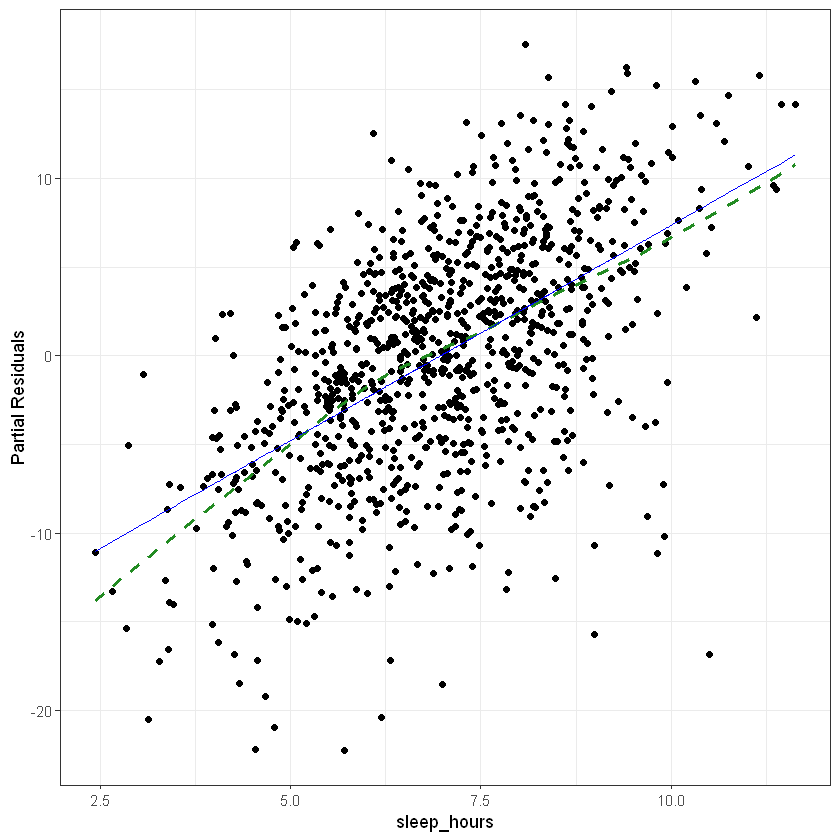

In [127]:
plot_partial_residual(data, terms_md, partial_residual_md, variable = "sleep_hours")

`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at -0.005"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 1.005"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition number  0"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"There are other near singularities as well. 1.01"


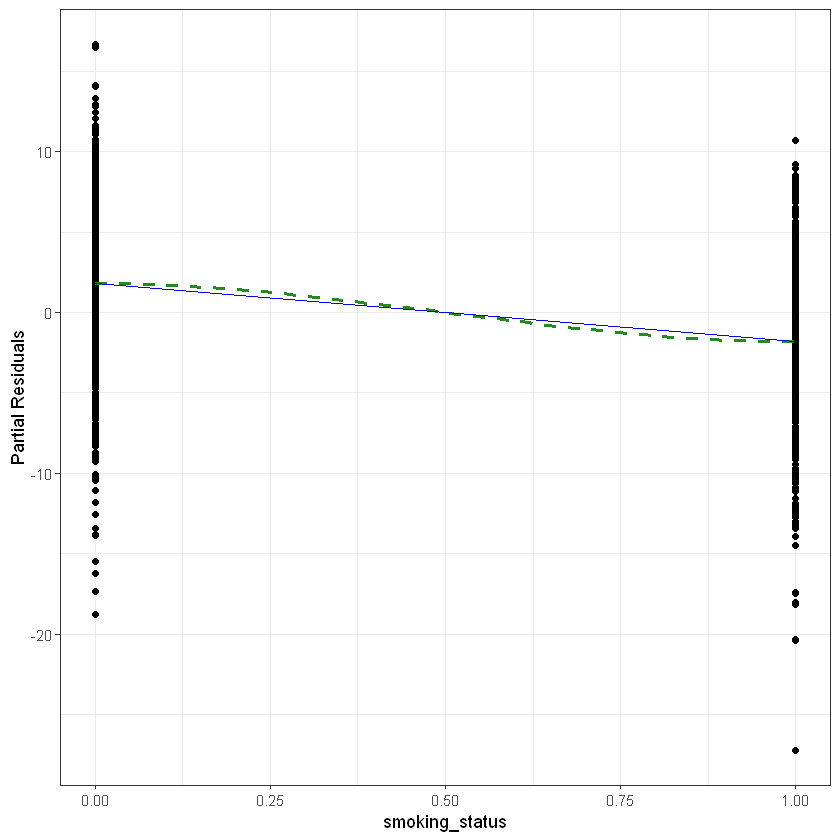

In [128]:
plot_partial_residual(data, terms_md, partial_residual_md, variable = "smoking_status")

`geom_smooth()` using formula = 'y ~ x'


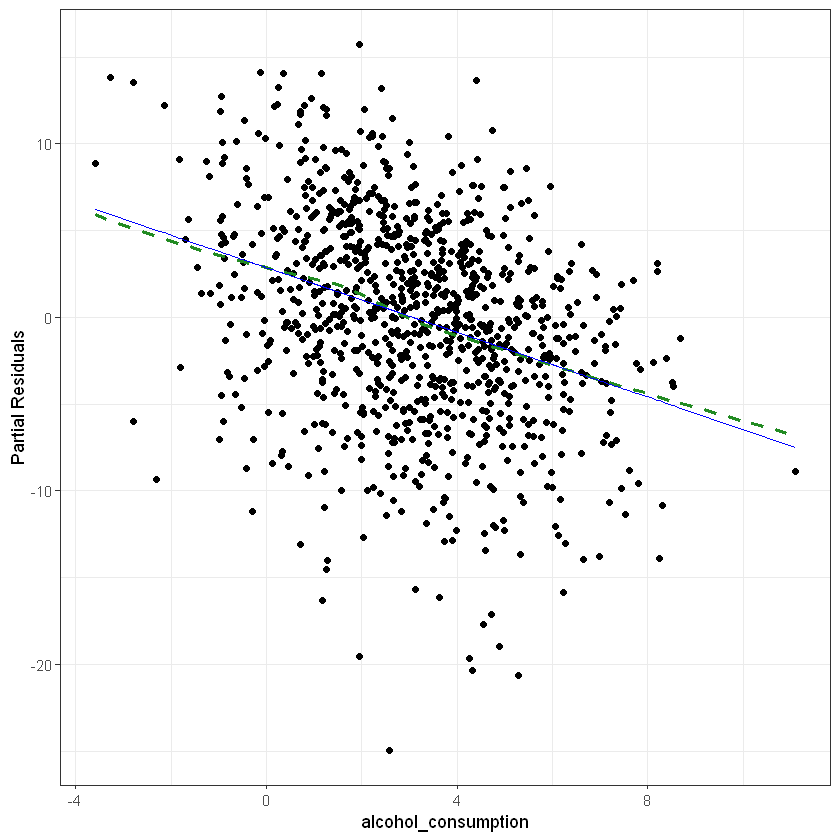

In [129]:
plot_partial_residual(data, terms_md, partial_residual_md, variable = "alcohol_consumption")

Kết quả cho thấy đường thẳng tuyến tính (màu xanh dương) ước lượng tương đối khớp với dữ liệu

Hình vẽ cho thấy xu hướng đường cong màu xanh lá rất đáng kể, giả định về tính tuyến tính của mô hình là không rõ ràng

In [130]:
model_interaction = lm(formula = sales ~ tv*radio + newspaper, data=data) # chỉnh fomular và các biến cần plot
terms_md_interaction <- predict(model_interaction, type='term')

# Calculate partial residuals for the interaction model
partial_residual_md_interaction <- residuals(model_interaction, type='partial')


plot_partial_residual(data, terms_md_interaction, partial_residual_md_interaction, variable = "tv")
plot_partial_residual(data, terms_md_interaction, partial_residual_md_interaction, variable = "radio")
plot_partial_residual(data, terms_md_interaction, partial_residual_md_interaction, variable = "newspaper")

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

ERROR: Error in eval(predvars, data, env): object 'sales' not found


Kiểm tra đồng nhất phương sai, ta sử dụng biểu đồ **Scale-Location**

In [ ]:
library(gridExtra)

variance_check<- function(model) {
    p1 <- ggplot(data = model, mapping = aes(x = .fitted, y = .resid)) +
        geom_point() +
        geom_smooth(method = "loess", se = FALSE) +
        geom_hline(yintercept = 0, linetype = "dashed") +
        labs(x = "Fitted values", y = "Residuals") +
        theme_bw()

    p2 <- ggplot(data = model, mapping = aes(x = .fitted, y = sqrt(abs(.stdresid)))) +
        geom_point(na.rm = TRUE) +
        geom_smooth(method = "loess", se = FALSE, na.rm = TRUE) +
        labs(x = "Fitted Values", y = expression(sqrt("|Standardized residuals|"))) +
        theme_bw()

    grid.arrange(p1, p2, nrow = 1, ncol = 2)
}

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


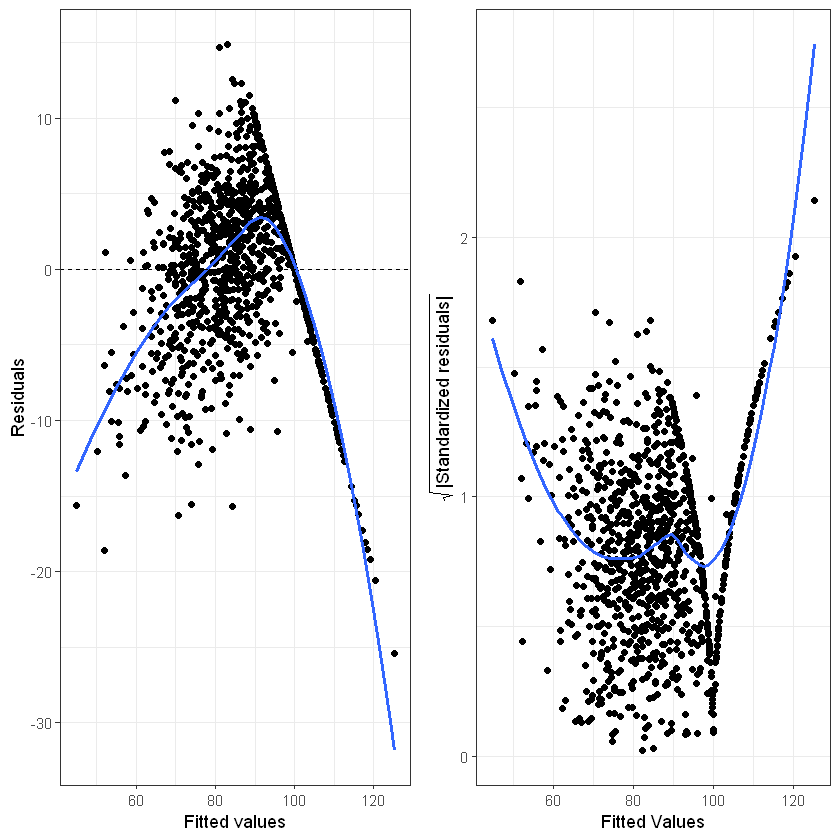

In [ ]:
variance_check(linear_model)

Kiểm tra riêng từng biến

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


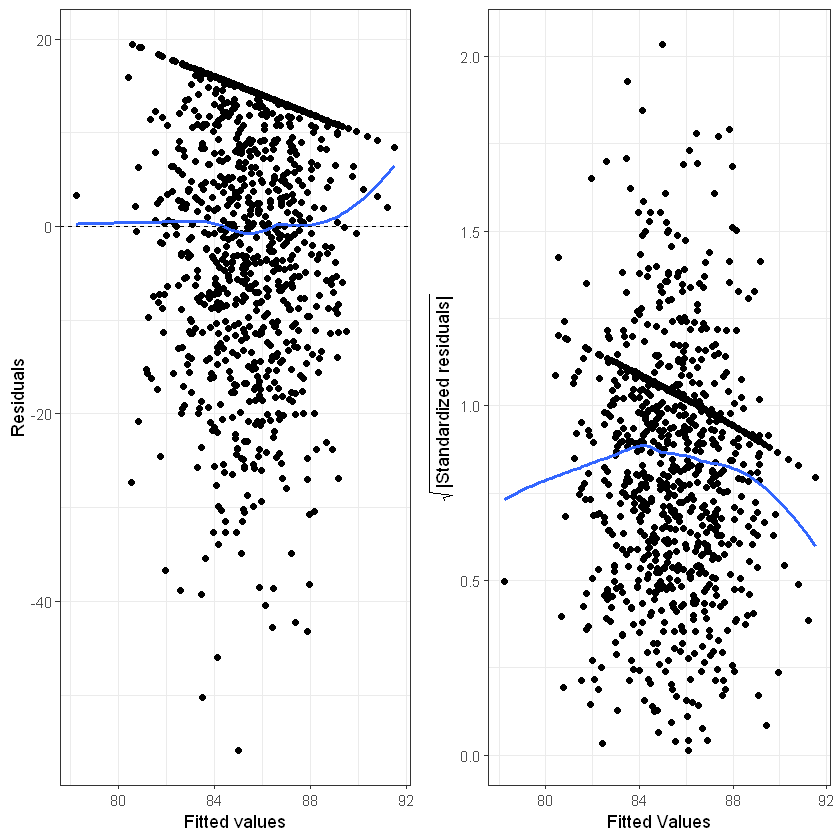

In [ ]:
diet_quality_md <- lm(health_score ~ alcohol_consumption, data=data)
variance_check(diet_quality_md)

Nhìn vào biểu đồ Scale-Location ta thấy xu hướng của dữ liệu không xấp xỉ đường thẳng 1 $\to$ ám chỉ phương sai thặng dư là không đồng nhất 

Kiểm tra ngoại lại trong mô hình, ta dùng biểu đồ Residuals vs Leverage

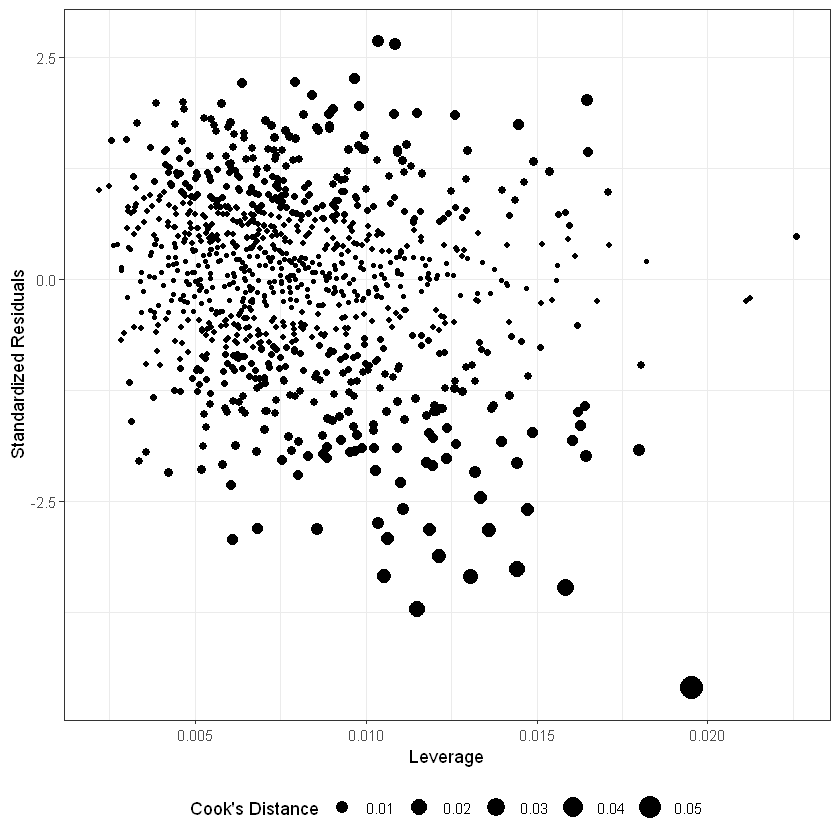

In [ ]:
ggplot(linear_model, aes(.hat, .stdresid)) +
    geom_point(aes(size = .cooksd)) +
    xlab("Leverage") + ylab("Standardized Residuals") +
    scale_size_continuous("Cook's Distance", range = c(1, 6)) +
    theme_bw() +
    theme(legend.position = "bottom")

In [ ]:
std_resid_md <- rstandard(linear_model)
hat_values_md <- hatvalues(linear_model)
cooks_D_md <- cooks.distance(linear_model)

In [ ]:
data_cooks_md_adv <- tibble(id_point = 1:nrow(data),
                            rstand = std_resid_md, hats = hat_values_md,
                            cooks = cooks_D_md, health_score = data$health_score) # chỉnh biến mục tiêu
data_cooks_md_adv |> arrange(desc(cooks))

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

id_point,rstand,hats,cooks,health_score
<int>,<dbl>,<dbl>,<dbl>,<dbl>
356,-4.599512,0.019512568,0.052626673,100.00000
592,-3.466192,0.015826148,0.024150089,100.00000
656,-3.716083,0.011490602,0.020065168,100.00000
352,-3.263771,0.014421629,0.019483753,100.00000
407,-3.344740,0.013050174,0.018490811,100.00000
879,-3.122548,0.012134199,0.014970679,100.00000
959,-3.348793,0.010547656,0.014943341,33.25335
110,-2.825723,0.013609793,0.013771203,29.10602
76,-2.597151,0.014710918,0.012588691,100.00000


Kiểm tra tính đa cộng tuyến, ta tính hệ số lạm phát phương sai VIF của từng biến trong mô hình

$$
\text{VIF} = \frac{1}{1-R^2_{X_j | X\_j}}
$$

In [ ]:
vif_values <- vif(linear_model)
vif_df <- data.frame(VIF = vif_values)
print(vif_df)

                         VIF
age                 1.003274
bmi                 1.005852
exercise_frequency  1.001907
diet_quality        1.002628
sleep_hours         1.003308
smoking_status      1.003011
alcohol_consumption 1.001871


Nhận xét: ....